In [151]:
from glob import glob
import pandas as pd
import time
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from korea_font import initKoreaFontLoad
initKoreaFontLoad()

Malgun Gothic


In [3]:
files = glob('C:/Users/User/Desktop/text\\*.txt')
files[:2]

['C:/Users/User/Desktop/text\\(O)도굴왕.txt',
 'C:/Users/User/Desktop/text\\(O)범죄의신.txt']

In [212]:
from konlpy.tag import Okt
t = Okt()

In [5]:
tmp_raws = []
for file in files:
    print(file)
    with open(file,'r',encoding='utf-8') as f:
        tmp_raws.append(t.nouns(f.read()))
       

C:/Users/User/Desktop/text\(O)도굴왕.txt
C:/Users/User/Desktop/text\(O)범죄의신.txt
C:/Users/User/Desktop/text\(O)주인공이 힘을 숨김.txt
C:/Users/User/Desktop/text\과학도의 판타지세계 적응기 01-78 (완).txt
C:/Users/User/Desktop/text\나태한 소드마스터 001-252 (완).txt
C:/Users/User/Desktop/text\납골당의+어린왕자+1-444.txt
C:/Users/User/Desktop/text\내 가족 정령들(완).txt
C:/Users/User/Desktop/text\대마법사의 귀환 001-206.txt
C:/Users/User/Desktop/text\마법사 무림에 가다 01.txt
C:/Users/User/Desktop/text\마법사 무림에 가다 02.txt
C:/Users/User/Desktop/text\마법사 무림에 가다 03.txt
C:/Users/User/Desktop/text\마법사 무림에 가다 04.txt
C:/Users/User/Desktop/text\마법사 무림에 가다 05.txt
C:/Users/User/Desktop/text\마법사 무림에 가다 06.txt
C:/Users/User/Desktop/text\마법사 무림에 가다 07.txt
C:/Users/User/Desktop/text\마법사 무림에 가다 08.txt
C:/Users/User/Desktop/text\마법사 무림에 가다 09.txt
C:/Users/User/Desktop/text\마법사 무림에 가다 10.txt
C:/Users/User/Desktop/text\마법사 무림에 가다 11.txt
C:/Users/User/Desktop/text\마법사 무림에 가다 12.txt
C:/Users/User/Desktop/text\마스터_오브_웨폰_1권.txt
C:/Users/User/Desktop/text\마스터_오브_웨폰_2권.txt
C:/

In [6]:
with open('C:/Users/User/Desktop/text/ss/ss/전생검신轉生劍神+1-1067.txt','r',encoding='utf-8') as f:
    tmp_raws.append(t.nouns(f.read()))
with open('C:/Users/User/Desktop/text/ss/ss/[유성] 아크 더 레전드 01-35 (001-875).txt','r',encoding='utf-8') as f:
    tmp_raws.append(t.nouns(f.read()))


In [228]:
def myFileter( x ):
    if len(x)==3: 
        if x in filter_words:
             return False
        return True
    else:
        return False

In [414]:
filter_words = [ 
    '.','(',')','%','-','의','을','다','만','로','제','호','및','이','항','것','그','말','수','이','내','나','생각','사람',
    '자신','안','거','때','뭐','저','놈','지금','눈','더','곳','정도','몸','하나','알','우리','다른','시작','때문','일','얼굴','뒤','게','그것','건','전',
    '고개','그녀','마법','다시','시간','모습','소리','표정','이제','순간','겨울','유물','무슨','바로','인간','상황','모든','사실','역시','여기','모두','가지','목소리','이유','존재','머리',
    '보고','이야기','위해','녀석','자리','정말','이번','거리','조금','사이','세계','사용','마음','라일','잠시','이상','문제','대답','마법사','공격','처음','상태','그때','그게',
    '일단','그냥','나이','이름','어디','라면','남자','스킬','가장','리가','에이','당신','능력','상대','방법','모양','이건','마력','해도','정신','갑자기','정보','다음',
    '세상','수도','시선','유저','누구','확인','미소','그대로','기억','여자','뭔가','계속','오늘','아이','동안','마치','진짜','동시','전투','거기','아주','걱정',
    '먼저','레벨','준비','필요','기분','영혼','차원','주변','기운','무엇','혹시','이해','병사','바닥','대해','분명','몬스터','설마','의미','직접','마나','건가',
    '설명','방금','경우','게다가','한숨','수가','일행','대체','덕분','마지막','일이','거지','하늘','능력자','아무','얼마나','또한','발견','사내',
    '공간','전부','기사','질문','제대로','정령','속도','전쟁','거의','얼마','대신','아빠','이용','주인','대장','부분','제국','어깨','반응',
    '함대','원래','마을','명의','주위','언제','현재','어차피','괴물','서로','아래','수준','따위','더욱','눈치','당장','폭발','무기',
    '바람','자기','가슴','만약','당황','눈빛','드래곤','행동','이후','구도','보이지','신의','비명','느낌','무덤','하하',
    '분위기','혼자','듯이','대화','귀족','새끼','신경','악마','살짝','자체','사건','게임','내용','잠깐','자식',
    '눈동자','만큼','결과','실력','물건','형님','전혀','우주','도착','과거','방어','누가','방향','오히려','동해',
    '통해','대부분','도움','순식간','이동','회장','누군가','나라','친구','저희','처리','손가락','정체','연방','고민',
    '감정','종족','마스터','선택','기회','웃음','효과','도시','말씀','그거','장소','집중','보기','무언가','후작',
    '눈앞','지역','마찬가지','인물','자네','굳이','퀘스트','다리','무리','시체','아마','크게','소환','싸움','피해',
    '너희','균열','실제','위치','하루','스스로','어둠','은하','전체','파괴','지도','달리','예상','부대','마리',
    '걸음','결정','죽음','위로','실버','기술','영웅','젠장','여러','마족','아이템','인사','충격','심장',
    '건물','저기','목숨','다만','황제','도대체','입술','개척','어쨌든','가능성','마차','미래','채널','스타','소년','상상','형태','잡고','한번','고작','발동',
    '최고','계획','부탁','등급','숫자','머릿속','변종','눈물','학살','진행','유지','가면','내부','벌써','이군','기도','이기','타고','입장','아버지','절대',
    '소드','파악','예전','판단','영상','달라','의지','주먹','얘기','노인','라마','심지어','관심','작전','나무','허공',
    '보지','안이','여인','나머지','이내','대로','부하','저런','경험','약간','고통','계약','목적','장님','수십','명령','마왕','별로','움직임','포기','무시','남아',
    '경계','겨우','너머','전사','근처','멀리','나중','로서','아르','현실','관련','감각','도련님','실드','중국','지구','가족','보이','전함','동료','임무',
    '던전','조건','약속','보통','평소','어쩌면','문자','병력','팬텀','우선','크기','미터','혹성','의심','장면','작품','메시지','변화','가운데',
    '이전','저택','지휘','상처','대륙','왕국','다행','훈련','카르마','이면','최대한','골렘','점점','학생','마법진','감히','비밀','품계',
    '비교','우주선','연구','율리','애초','주가','관계','정리','인지','보상','사랑','신체','촉수','일부','무정','나름',
    '추가','대가','운명','멍하니','분노','일반','움직','주문','오빠','아아','정의','박살','편이','관리','연락',
    '클랜','데리','가득','단원','데스','아악','잘못','소녀','환수','상승','입구','시스템','회복','재앙','용병','레드',
    '무척','아가','여유','의식','사방','선물','어찌','시험','에너지','자연','연기','음성','나이트','발생',
    '미리','동생','미국','화살','주지','냄새','하자','진심','어이','흔적','빌어먹을','한참','등장','의문','아들','제법','제외','공주','과정','과연','군단',
    '확률','비록','물구','사제','장비','중앙','침묵','지니','중심','이자','소문','폭탄','대상','위험','인정','거나','짐작','성격',
    '물구','묻구','음식','다섯','정부','마주','전장','감사','놀란','긴장','확신','초월','조심','그림','허리','단장','곧바로','광경','차이','응시','스승','동아','항상','기분','접근','어째서','늑대','자세','노력','따라서','식사','요즘',
    '기본','후기','보호','반지','서클','그동안','경비','대충','작업','시도','한마디','지원','정상','수백','감화','사냥','인상','폭풍','위협','차례','한계','실험','아예','결코','한편','적의','안개',
    '강화','었다','차라리','꼬리','공포','연결','대기','방식','저었다','여러분','날개','영향','무릎','한쪽','일부러','며칠','지하','보아','주머니','제일','구멍','문득','영역','기능','체력',
    '주의','잔뜩','범죄','그대','탄환','장난','지식','풍경','간다','재료','의아','가까이','살기','끄덕','투투','조직','역할','태도','아침','반드시','공기','보스',
    '재능','동굴','자의','까마귀','생명','노예','지난','칼리','지토','압도','씨익','가문','가가','혼란','침대','단지','기간','라트','오직','라스','조각','이슈',
    '어머니','기계','전달','개인','기특','공장','본래','내일','구석','반대','통제','종이','프리','지배','어서','골드','의자','바깥','방해','포함','소식','의도',
    '기록','공장','거래','대고','작가','반복','사태','저주','마침내','천마','온몸','완성','국가','증거','치료','기지','제자','바사','공허','고대','어제','회의',
    '공작','시야','표현','머리카락','사고','상자','전화','피하','흡수','본인','전력','상급','군대','특수','물어','지지','인원','사격',
    '도저히','다해','대략','말로','대한','자가','단어','참고','시오','런가','하라','생활','말투','제발','번쩍','취하','더니','평생','길이','착각','주시','화가','신음','이익','탁자','물구','고생','방문','렸다',
    '서서히','물구','깜짝','이지','다가','활동','호기심','은근','일주일','얼음','듣기','웃음소리','실수','발걸음','치기','압박','감탄','오지','상관','입가','마음속','용서','단체','자주','털썩','이마','결혼','매우','가끔','끼리',
    '묻구','결혼','소개','크아','자꾸','기대','타격','자랑','방이','기절','일인','찾기','내지','주기','높이','맑은','왼쪽','자고','하니','리기','수고','활짝','덩이','재미','최선','차마','감고','구름','옆구리','몰구','묻구','물구',
    '최소한','이제야','발자국','헛기침','번갈아','자존심','거짓말','무조건','덩어리','오른쪽','상대방','주인공','아저씨','참으로','땅바닥','만들기','마음껏','뒤통수','마무리','궁금증','식은땀','소유자','어딘가','일일이','손바닥','비웃음','파이어','한순간','그림자',
    '자신감','취했다','두려움','몸부림','부르르','뿜어저','하나로','심호흡','반대편','이미지','절대로','늙은이','무표정','아랑곳','한바탕','뒷모습','내뿜는','긴장감','손아귀','불안감','이해해','상대로','오른손','엉덩이','인지도','함부로','어르신','우르르','모조리',
    '갈수록','부모님','깨달음','평상시','속마음','도무지','아가씨','자마자','쓰레기','허벅지','옷차림','맺혔다','모자라','미사일','헛소리','맞은편','강아지','고양이','로부터','똑바로','무거워','불가능','무의식','좀처럼','애송이','대가리','아이스',
    '클래스','영향력','짓거리','밤하늘','신경질','한가지','장본인','뒷걸음','숨소리','저절로','눈초리','검은색','투성이','조그만','억지로','판타지','역사상','일부분','무작정','푸른색','거꾸로','호랑이','목적지','글세요','꼬맹이','그다지',
    '글쎄요','자네도','개새끼','달리기','물고기','나라고','푸른빛','희망이','반나절','목구멍','일반인','생명체','나가야','생기지','라이트','감탄사','블링크','대대로','호들갑','정반대','부리고','큰소리','오늘이','둘이서','상당수','무서움',
    '어쩐지','배신자','거렸다','발길질','실었다','목걸이','혼잣말','옷자락','가다가','하룻밤','부작용','발버둥','쉽사리','글렸다','여자도','고요한','끝내기','지팡이','플라이','후후후','지그시','코웃음','쪼가리','멋대로','최고급','바가지',
    '성좌','시나리오','좀비','독자','갈사','교주','제갈','화신','백련교','무공','보안관','혜성','신류','고수','수련','술법','이윽고','해결','전생','봉인','기색','두시안',
    '지경','무림','지배자','대꾸','대원','아스','천계','도깨비','후의','뿜어져','뽐어져','뿝어져','뿜어저','뽐어저','뿝어저',
    '글렸다','비정상','제자리','죄책감','당분간','어려움','필요성','손잡이','섣불리','사람과','인기척','장난감','하물며','돌리지','무방비','모양새','조만간','물방울','기지개','갈가리','아쉬움','부족함','물덩이','수상한','때마침','집무실',
    '불덩이','글렸다','급속도','생김새','보고서','밑바닥','난이도','어디가','현기증','대규모','하얀색','주르륵','공통점','활성화','내뿜으','갈무리','겉모습','허리춤','벙어리','버려진','싸가지','주기도','으르렁','돌맹이','잔소리',
    '굴렸다','버티고','돌멩이','살포시','이이이','대리석','랍시고','팔꿈치','생명력','길거리','닥치고','전투력','더욱이','어쩌려','한구석','아무나','즐거움','겉보기','곁보기','휘파랑','때로는','몸뚱이','결과물','말소리','우연이','충격파','여실히',
    '휘파람','잠꼬대','환호성','메아리','조각상','그었다','바다로','어쩌자','테이블','실랑이','거슬러','스타일','먹잇감','초토화','가로막','몽둥이','빠르기','우렁찬','지금껏','쌍둥이','몸으로','음으로','반대쪽','이벤트','이처럼','정해진','후다닥','잠자리','더욱더','손수건','말장난','자부심','드레스','콧노래','안간힘','치명상','할머니','더없이','사람인','고마움','뿜었다','뽐었다','붉혔다','흐트러','수치심','다시금','가려진',
    '당사자','가르침','모닥불','스르르','뿐더러','하여튼','책임자','내용물','사용자','정수리','컨트롤','튕겼다','스토리','옷가지','보라색','게이트','존재도','파란색','비로소','선생님','나오니','심부름','구덩이','컴퓨터','여자애','캐스팅','해주시','잠자코','줄줄이','난장판','핏방울','무차별','바라지','생존자','꼭대기','발차기','무심코','어젯밤','땀방울','통틀어','제각기','어금니','일순간','갈림길',
    '화장실','데미지','원거리','기사단','문제점','근거리','대다수','무력감','짊어지','인터넷','올린다','인내심','최상급','사기꾼','택했다','전문가','피해자','범죄자','포식자','싸구려','보따리','팔다리','젓가락','헛웃음','서비스','후유증','제각각','멍청이','책임감','속삭임','핏자국','스파크','양으로','페이지','눈꺼풀','쓴웃음','흐릿하','목덜미','실마리','물줄기','생물체','일직선','미성년','스케일','그리스',
    '나누기','테스트','지평선','산더미','만족감','얼떨결','타이밍','나와라','그따위','일이십','본보기','마누라','하나요','개구리','여동생','자꾸만','존경심','아래층','던지기','카운터','지원이','회의실','하반신','밸런스','꽁무니','파트너','원숭이','초록색','띠었다','장애물','중심부','쨍그랑','판단력','마음씨','눕혔다','어린이','얼씨구','덩달아','그랜드','암살자','아래쪽','빈자리','페이스','거미줄',
    '눈시울','무릅쓰','무감각','마시기','존댓말','송곳니','나날이','잿더미','단시간','저대로','사이비','아버님','사이다','캐릭터','구경꾼','참가자','휘저으','쑥대발','주둥이','사냥꾼','바구니','무용담','플레이','나뭇잎','희생양','껍데기','난도질','건너편','오오오','개개인','레이스','여유도','돌똘이','전속력','음료수','디자인','겁쟁이','정의감','도구로','되풀이','막대기','장거리','어쨌거','불청객',
    '쑥대발','뿔뿔이','주의자','수식어','사무실','만이구','지름길','도둑질','무더기','살얼음','구역질','누르기','젊은이','어이쿠','등줄기','부채질','보랏빛','원동력','삽시간','수증기','패거리','값어치','도마뱀','혓바닥','복수심','죽겠네','샅샅이','발가락','발바닥','무작위','바깥쪽','절대자','숟가락','대여섯','불침번','막바지','날갯짓','바르게','부스럭','차리기','생채기','구경만','웅덩이',
    '쑥대발','쑥대밭','일이오','맞장구','뒷덜미','잠재력','드워프','날벼락','비밀리','히히히','개자식','얼굴빛','사이트','울타리','종업원','꼼지락','오케이','속임수','초대장','컨디션','경기장','한자리','도서관','먹거리','마르고','차이점','연예인','술자리','모서리','불쾌감','불괘감','전해질','위아래','괴로움','추종자','콧방귀','권력자','기필코','계약서','라이벌','망나니','말다툼','전성기',
    '간문제','사망자','실루엣','지렁이','뒤집힌','말꼬리','유리창','중심지','전염병','조사해','그리기','튕겨저','조력자','정신병','부린다','부스스','삿대질','종잇장','산산이','손사래','가부좌','그리움','브레스','스피어','텍스트','주르르','독수리','콧구멍','도박장','아가리','사이즈','잔챙이','사나이','경쟁자','동질감','특화된','다혈질','더라도','경호원','도망자','대리인','버러지',
    '상반신','튕겨저','튕겨져','저항력','아줌마','포인트','광신도','저만큼','현관문','방망이','자물쇠','데이터','건축물','케이스','와르르','머리칼','먹구름','십자가','관리자','타이핑','골목길','시치미','기사도','독차지','지옥도','전리품','수뇌부','구성원','아이야','신분증','정상인','구릿빛','귓속말','앞머리','실시간','목격자','팽팽하','헤벌쭉','쇠사슬','호기롭','이상하','관심사','버거운',
    '곳곳이','소규모','병아리','골똘히','상상력','달린다','얼마간','턱수염','은하수','음식점','아우성','가슴속','검색어','틈틈이','사춘기','눈망울','불현듯','말발굽','은연중','당나귀','연거푸','심정은','대도시','이제껏','붉은빛','어머나','부리면','데이트','남아도','비행기','변화가','방해꾼','이해도','구구구','지도자','리스트','동강이','주먹질','동감이','꼬르륵','도리어','최고다','마인드',
    '변화가','뒷받침','베스트','가치관','스토커','귀퉁이','오르다','항아리','총동원','민간인','노란색','장신구','관광객','딸아이','드라마','시간대','초특빛','일가견','살인마','자동차','어이구','주용성','단기간','골짜기','카메라','기시감','악취미','대기실','나이프','대장님','앞치마','용접실','나이스','핸드폰','스크롤','황금색','보호자','예상외','앞서서','두개골','넌지시','역효과',
    '번화가','변화가','초록빛','중요성','용접실','퍼센트','태양빛','폭팔력','물음표','분풀이','소모품','기하학','비처럼','포물선','겹겹이','요리사','가속도','중압감','빠드득','관계도','빙그레','울었다','어쨋다','제스처','마찰음','오른발','제기랄','일대일','최대로','터트린','초능력','아이디','뿌드득','테라스','마스크','대통력','괴롭힘','개죽음','갈비뼈','사생활','최적화','정강이','대상자',
    '응접실','폭발력','읊었다','어쨌다','대통령','생활비','지난번','흉내내','지하실','눈썰미','하나라','자꾸나','모가지','도시락','이어도','클리어','황무지','래서야','비비고','외적인','일회용','파이프','대명사','모처럼','해독제','헛소문','해프닝','사거리','라운드','중요시','열등감','장식품','빗자루','남동생','주사위','눈웃음','보이시','연합군','신기루','스피드','출입구','여태껏',
    '빨간색','노여움','쥐꼬리','코끼리','그다음','영양분','진저리','바닷가','외국인','회의장','곰팡이','나가시레이저','구세주','으드득','친화력','전부일','연구실','소유권','피우지','타이틀','위험성','블랙홀','보너스','장례식','한국인','동영상','소고기','화이트','눈덩이','민첩성','모퉁이','알코올','위태롭','라이프','대체로','구성은','금속성','몸조리','테두리','미지수',
    '이동해','나가시','레이저','몸조심','삼각형','무적인','초승달','곁눈질','씀씀이','차림새','통성명','기다림','새로이','찌꺼기','흐느끼','거북이','몸서리','급선무','무한정','합리화','입맞춤','마이크','경험치','연ㄱ소','신호탄','뀌었다','용의자','한소리','봉우리','원심력','엊그제','노가다','미소녀','도가니','엘리트','유전자','게거품','어쩌실','반딧불','박치기','미완성','일단락',
    '연구원','연구소','기어이','폭풍우','볼거리','철부지','담당자','비공식','소지품','뭐시기','숨쉬기','기념품','인터뷰','누더기','융통성','종아리','공무원','용광로','마우스','장사꾼','교과서','으름장','현상금','어딘데','또르르','날붙이','불합리','유치원','뉘앙스','동물원','말실수','머리털','일거리','두더지','피부색','결혼식','칼부림','얼간이','스위치','툭하면','도자기','감시자',
    '끄나풀','주황색','사회자','로맨스','방아쇠','폭포수','천문한','일찍이','수행원','중학교','상들리','얼음장','이래봬','수백만','더구나','게시판','초대형','괴리감','눈높이','언데드','마나도','밤바람','수정구','외로움','주제가','무신경','대폭발','노리개','바닷물','장시간','다람쥐','지루함','바스락','눈싸움','쇳소리','여행자','영양가','흰자위','안정화','하소연','빗방울','앞마당',
    '천문학','상들리','샹들리','딸꾹질','흘겼다','다다다','내게로','알갱이','모니터','탈바꿈','옥수수','뭉텅이','우지끈','제작자','머리색','답시고','참을성','붙임성','피라미','뒤엉킨','폐쇄적','대학생','지지리','실험실','노트북','나가요','뿜어대','가파른','자존감','과반수','멧돼지','창조주','일요일','문외한','벌처럼','별처럼','대자연','기계로','초보자','패널티','페널티','한국어','사령광','선착순','가랑이',
    '사령관','불이익','부산물','정신과','타원형','유명인','과학자','인간성','고용주','허투투','원피스','의지력','어머님','재활용','배설물','운동장','아지트','말버릇','매무새','뒷골목','전하라','해안가','놨는데','꾸러미','피바다','방향성','몸무게','체인지','이기심','효과음','선입견','형광등','꼬았다','분홍색','방문객','조바심','꽃처럼','적개심','퍼뜨리','드르르',
    '무수수','우수수','허투루','허투투','허루루','귀걸이','눈보라','오지랖','불규칙','생기며','이방인','종소리','간간이','주전자','노인도','고향이','갈고리','특이점','갖가지','반발력','지구력','통나무','쩌저적','편안함','활시위','내뿜기','내뽐기','대각선','고요함','만이오','꼬투리','헛바람','초상화','마르지','번데기','머금으','동양인','퍼부은','부쉈다','별의별','벌의벌','어쩌긴','오렌지','뱃가죽','오징어',
    '희소식','라이터','손동작','저따위','모험가','정치인','우두득','우두둑','리스크','잘해야','한마음','푸르락','케이트','관계자','추적자','플러스','작업장','문지기','첫인상','두번째','오라비','생매장','고구마','한밤중','세계관','가로등','살인자','포스터','러시아','조심성','스페셜','외로워','자고로','포지션','상대편','승리자','밥그릇','물기둥','불기둥','음식물','관리인','수평선','계집애',
    '파열음','메뉴얼','사냥개','아이들','아이돌','경비원','만천하','파충류','업로드','아파트','순발력','웨이브','냉장고','기름기','파이팅','길잡이','구조도','대머리','판박이','정보원','인사말','보상금','돌다리','바르르','슬로우','추스른','초콜릿','이상인','우승자','구경해','생태계','부처님','겨눴다','보름달','콰과광','줄타기','생필품','인간계','행복감','한사코','유리잔','매뉴얼'
    
]


In [415]:
len(filter_words)

2086

2085

In [399]:
# tmps=tmp_raws
# tmp=[]
# for t in tmps:
#     t=list(set(t))
#     tmp.extend(t)


In [400]:
# tmp=[]
# for t in tmps:
#     tmp.extend(t)
# print(len(tmp))
# tmp  = list( filter( lambda x:myFileter(x), tmp) )
# tmp  = list( filter( lambda x:myFileter(x), tmp) )


In [401]:
#ko = nltk.Text( tmp, name='소설들' )


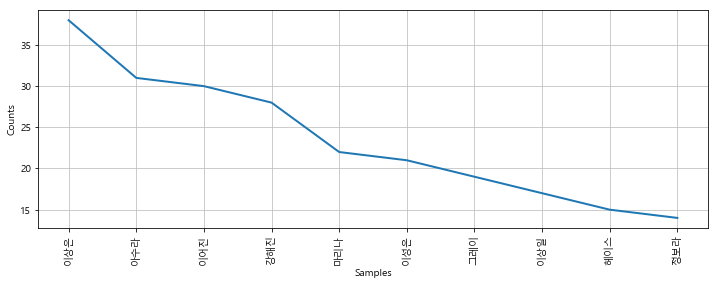

In [413]:
plt.figure(figsize=(12,4))
ko.plot( 10 )
plt.show()

In [2]:
from collections import Counter
from operator import itemgetter
C=Counter(tmp)
sorted_C = sorted(C.items(), key=itemgetter(1), reverse=True)
df=pd.DataFrame(sorted_C)
overlap=df[df[1]==44]
len(overlap)

NameError: name 'tmp' is not defined

In [219]:
a=''
for over in overlap[0]:
    a=a+over+' '
print(a)

눈치 참고 얼마나 이유 느낌 속도 기분 말로 하루 해도 보이지 방향 확인 서서히 갑자기 명의 건가 무엇 바로 주지 한숨 잘못 이해 라면 대한 마지막 오늘 최고 도착 데리 정도 대략 서로 사람 문제 순식간 시작 사실 바람 기운 의미 얼굴 정신 어디 움직 일단 어차피 인사 자연 세상 목소리 모든 신경 그대로 시선 눈물 전혀 표현 제대로 결과 머리 상대 웃음 가슴 미소 다른 저희 아무 누구 보기 언제 기억 행동 잠시 저기 입장 이상 이야기 조금 남자 역시 누가 수가 고개 준비 우리 위해 대로 걱정 이름 하늘 유지 사이 공격 허리 달리 능력 아주 때문 소리 상황 어찌 어서 더욱 최대한 그것 무슨 사용 혹시 눈빛 한참 전체 당황 성격 필요 그녀 먼저 자신 그게 모양 표정 정말 분명 주인 지금 자리 마음 만큼 피해 다음 동시 덕분 하나 거리 시간 통해 방법 자가 오히려 무리 도저히 기회 머릿속 분위기 이용 감히 모습 수도 원래 보고 집중 듯이 기도 상상 마찬가지 이군 설마 단어 충격 하하 다해 다시 처음 상태 마치 대해 인물 도대체 이번 시오 대화 이기 생각 일이 보지 비명 냄새 싸움 동안 그냥 계속 이제 여기 나머지 순간 관계 모두 아이 한편 누군가 가득 나름 설명 멀리 가지 대답 


TypeError: 'kr.lucypark.okt.OktInterface' object is not callable

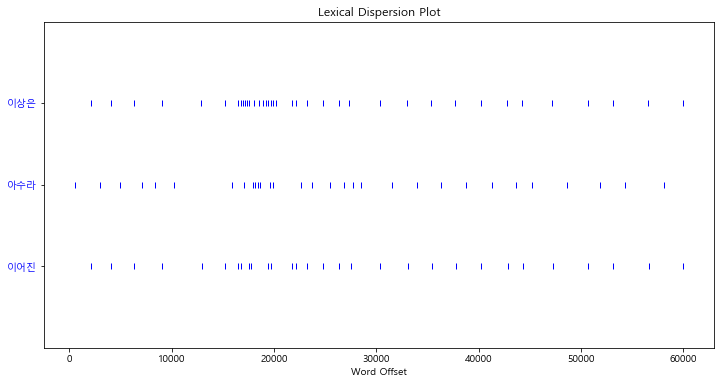

In [13]:
plt.figure( figsize=(12, 6) )
ko.dispersion_plot([ '이상은','아수라','이어진' ])

In [14]:
len(tmps[0])

386641

In [15]:
len(tmpss[0])

NameError: name 'tmpss' is not defined

In [ ]:
len(tmp_raws)